#  STUDENT MENTAL HEALTH EDA PROJECT

In [1]:
# IMPORT LIBRARIES
# ----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# For better visualization
plt.style.use("ggplot")
sns.set_palette("Set2")


In [2]:
# LOAD DATA
# ----------------------------
df = pd.read_csv("C:\python project\Pam\Student Mental health.csv")

In [4]:
# Show first rows
print(df.head().to_string())


      Timestamp Choose your gender   Age What is your course? Your current year of Study What is your CGPA? Marital status Do you have Depression? Do you have Anxiety? Do you have Panic attack? Did you seek any specialist for a treatment?
0  8/7/20 12:02             Female  18.0          Engineering                     year 1        3.00 - 3.49             No                     Yes                   No                       Yes                                           No
1  8/7/20 12:04               Male  21.0    Islamic education                     year 2        3.00 - 3.49             No                      No                  Yes                        No                                           No
2  8/7/20 12:05               Male  19.0                  BIT                     Year 1        3.00 - 3.49             No                     Yes                  Yes                       Yes                                           No
3  8/7/20 12:06             Female  22.0    

In [5]:
# INITIAL DATA CHECKS
# ----------------------------
print("\n🔹 SHAPE:", df.shape)
print("\n🔹 INFO:")
print(df.info())
print("\n🔹 DESCRIBE:")
print(df.describe(include='all'))

print("\n🔹 Null values per column:")
print(df.isna().sum())

print("\n🔹 Duplicate rows:", df.duplicated().sum())



🔹 SHAPE: (101, 11)

🔹 INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?           

In [6]:
# CLEAN COLUMN NAMES (REMOVE SPACES)
# ----------------------------
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

In [7]:
# FIX DISCREPANCIES IN COURSE NAMES
# ----------------------------
df["what_is_your_course?"] = df["what_is_your_course?"].str.strip().str.title()

# Example replacements (modify based on your dataset)
df["what_is_your_course?"].replace({
    "Bcs ": "Bcs",
    "Biomedical science": "Biomedical Science",
    "Engineering ": "Engineering"
}, inplace=True)

In [8]:
# CLEAN CGPA COLUMN (REMOVE SPACES)
# ----------------------------
df["what_is_your_cgpa?"] = df["what_is_your_cgpa?"].str.strip()

In [9]:
# RENAME TARGET COLUMNS FOR READABILITY
# ----------------------------
df.rename(columns={
    "do_you_have_depression?": "depression",
    "do_you_have_anxiety?": "anxiety",
    "do_you_have_panic_attack?": "panic_attack",
    "did_you_seek_any_specialist_for_a_treatment?": "consulted_specialist",
    "marital_status": "marital_status",
}, inplace=True)

yes_no_cols = ["depression", "anxiety", "panic_attack", "consulted_specialist"]

for c in yes_no_cols:
    df[c] = df[c].str.strip().str.title()  # Convert yes/no → Yes/No

print("\n🔹 Unique values in Yes/No columns:")
for c in yes_no_cols:
    print(c, df[c].unique())



🔹 Unique values in Yes/No columns:
depression ['Yes' 'No']
anxiety ['No' 'Yes']
panic_attack ['Yes' 'No']
consulted_specialist ['No' 'Yes']


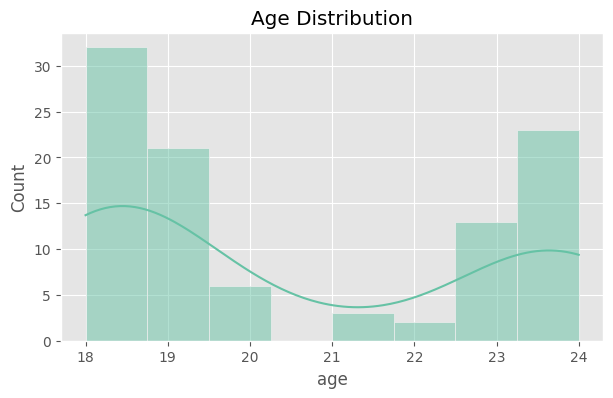

In [10]:
# BASIC VISUALIZATIONS
# ----------------------------
# 1. Distribution of Age
plt.figure(figsize=(7,4))
sns.histplot(df["age"], kde=True)
plt.title("Age Distribution")
plt.show()


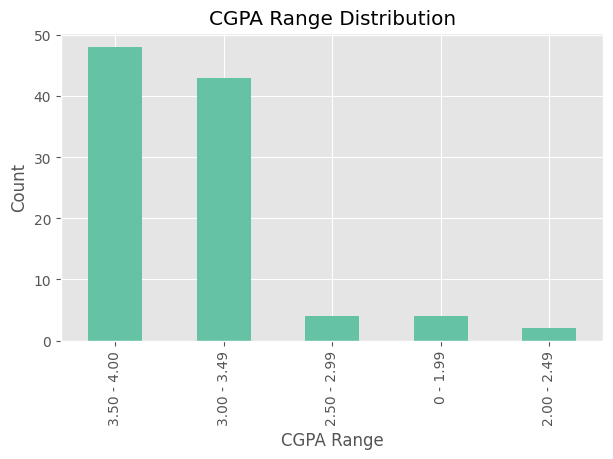

In [11]:
# 2. CGPA Distribution
plt.figure(figsize=(7,4))
df["what_is_your_cgpa?"].value_counts().plot(kind="bar")
plt.title("CGPA Range Distribution")
plt.xlabel("CGPA Range")
plt.ylabel("Count")
plt.show()


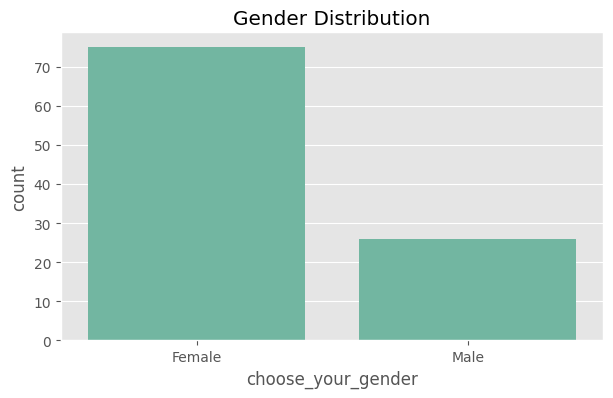

In [14]:
# 3. Gender Distribution
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="choose_your_gender")
plt.title("Gender Distribution")
plt.show()

<Figure size 700x400 with 0 Axes>

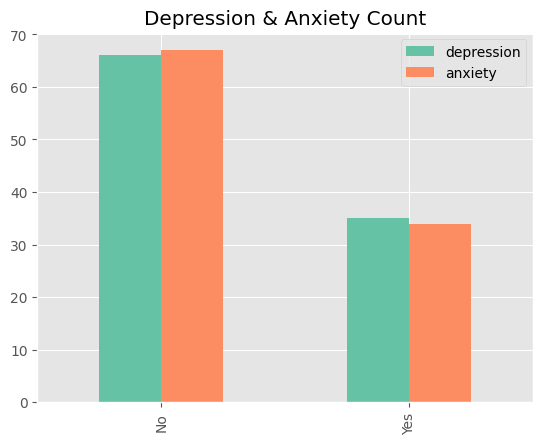

In [15]:
# 4. Depression vs Anxiety Count
plt.figure(figsize=(7,4))
df[["depression", "anxiety"]].apply(pd.Series.value_counts).plot(kind="bar")
plt.title("Depression & Anxiety Count")
plt.show()

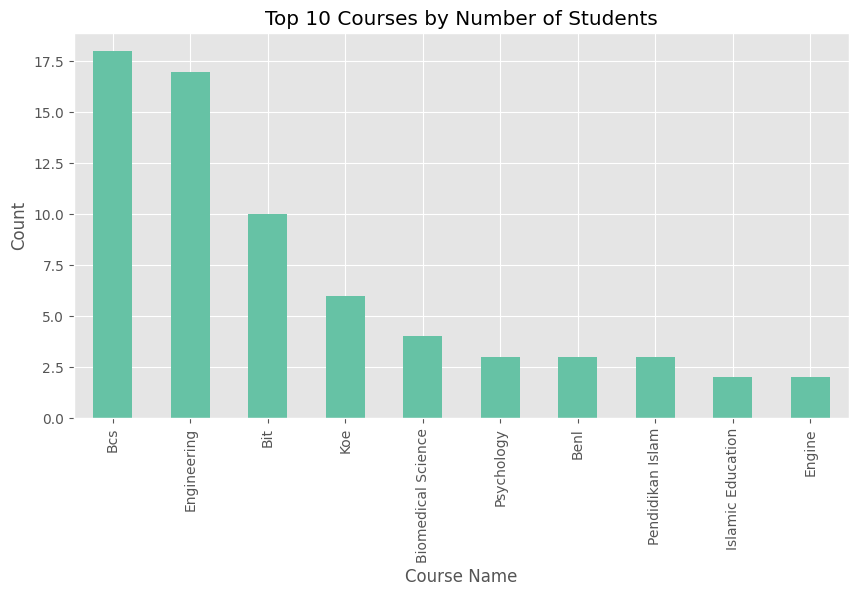

In [16]:
# TOP 10 COURSE DISTRIBUTION
# ----------------------------
plt.figure(figsize=(10,5))
df["what_is_your_course?"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Courses by Number of Students")
plt.xlabel("Course Name")
plt.ylabel("Count")
plt.show()

In [19]:
# SUBSET: STUDENTS WITH DEPRESSION
# ----------------------------
depressed_df = df[df["depression"] == "Yes"]

print("\n🔹 Depressed Student Info:")
print(depressed_df.info())



🔹 Depressed Student Info:
<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 98
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   35 non-null     object 
 1   choose_your_gender          35 non-null     object 
 2   age                         35 non-null     float64
 3   what_is_your_course?        35 non-null     object 
 4   your_current_year_of_study  35 non-null     object 
 5   what_is_your_cgpa?          35 non-null     object 
 6   marital_status              35 non-null     object 
 7   depression                  35 non-null     object 
 8   anxiety                     35 non-null     object 
 9   panic_attack                35 non-null     object 
 10  consulted_specialist        35 non-null     object 
dtypes: float64(1), object(10)
memory usage: 3.3+ KB
None


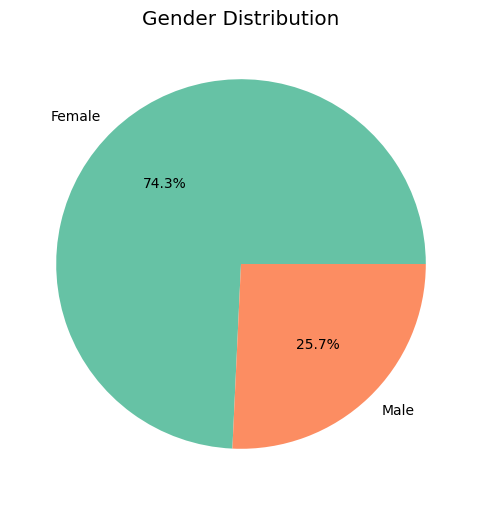

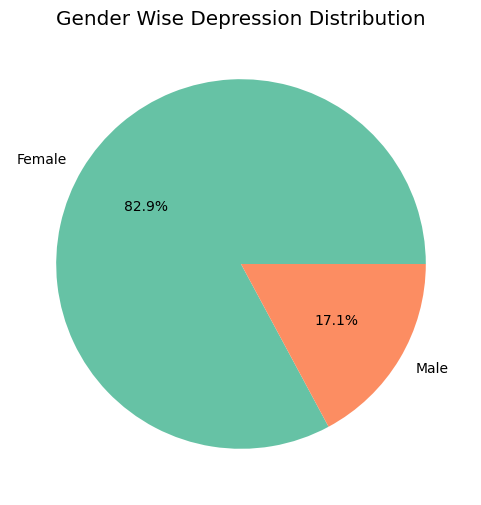

In [20]:
# PIE CHART: GENDER & DEPRESSION
# ----------------------------
plt.figure(figsize=(6,6))
df["choose_your_gender"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

plt.figure(figsize=(6,6))
df[df["depression"]=="Yes"]["choose_your_gender"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Gender Wise Depression Distribution")
plt.ylabel("")
plt.show()

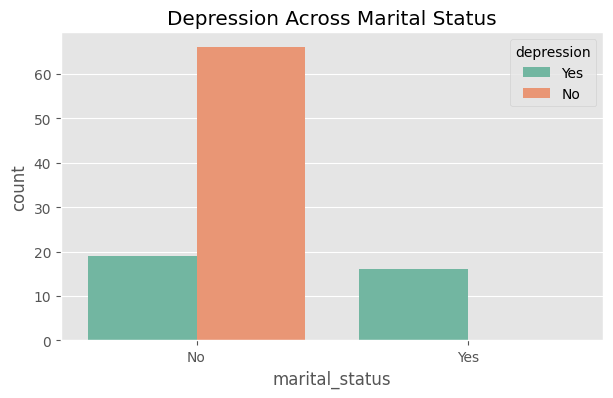

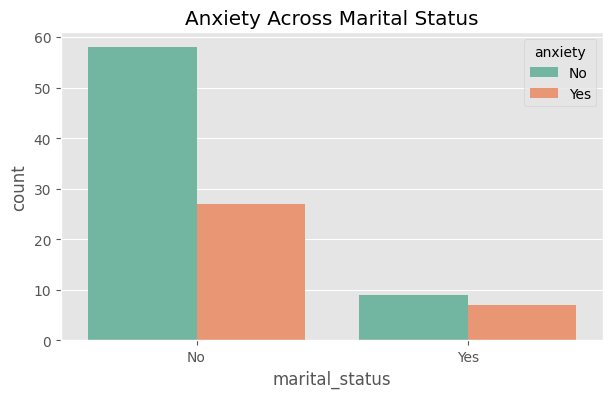

In [21]:
# DEPRESSION vs MARITAL STATUS
# ----------------------------
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="marital_status", hue="depression")
plt.title("Depression Across Marital Status")
plt.show()

# Anxiety vs Marital Status
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="marital_status", hue="anxiety")
plt.title("Anxiety Across Marital Status")
plt.show()

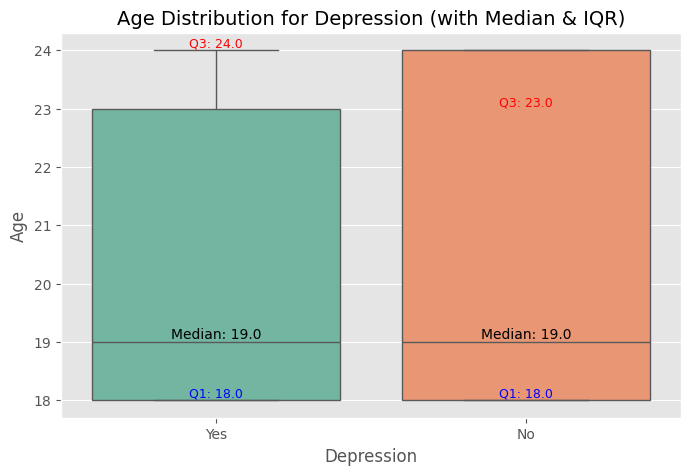

In [ ]:
# Boxplot: Age vs Depression

plt.figure(figsize=(8,5))
ax = sns.boxplot(data=df, x="depression", y="age", palette="Set2")
plt.title("Age Distribution for Depression (with Median & IQR)", fontsize=14)
plt.xlabel("Depression", fontsize=12)
plt.ylabel("Age", fontsize=12)

# ---- Add Median & IQR Labels ----
groups = df.groupby("depression")["age"]
positions = [0, 1]   # x-axis positions for Yes and No

for pos, (label, group) in zip(positions, groups):
    median = group.median()
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    
    ax.text(pos, median, f"Median: {median}", ha="center", va="bottom", fontsize=10, color="black")
    ax.text(pos, q1, f"Q1: {q1}", ha="center", va="bottom", fontsize=9, color="blue")
    ax.text(pos, q3, f"Q3: {q3}", ha="center", va="bottom", fontsize=9, color="red")

plt.show()


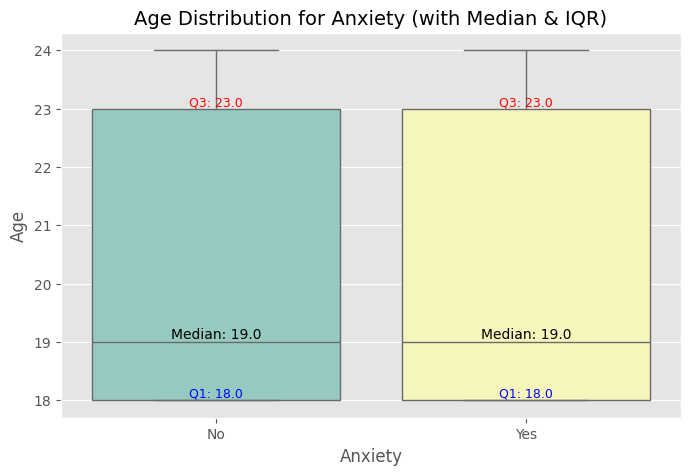

In [ ]:
# Boxplot: Age vs Anxiety

plt.figure(figsize=(8,5))
ax = sns.boxplot(data=df, x="anxiety", y="age", palette="Set3")
plt.title("Age Distribution for Anxiety (with Median & IQR)", fontsize=14)
plt.xlabel("Anxiety", fontsize=12)
plt.ylabel("Age", fontsize=12)

# ---- Add Median & IQR Labels ----
groups = df.groupby("anxiety")["age"]
positions = [0, 1]   # x-axis positions for No and Yes

for pos, (label, group) in zip(positions, groups):
    median = group.median()
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    
    ax.text(pos, median, f"Median: {median}", ha="center", va="bottom", fontsize=10, color="black")
    ax.text(pos, q1, f"Q1: {q1}", ha="center", va="bottom", fontsize=9, color="blue")
    ax.text(pos, q3, f"Q3: {q3}", ha="center", va="bottom", fontsize=9, color="red")

plt.show()


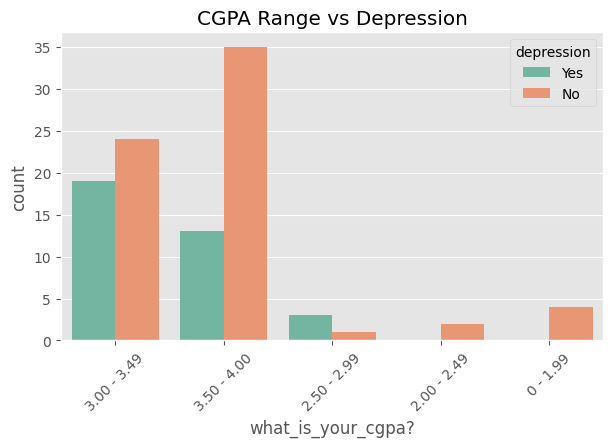

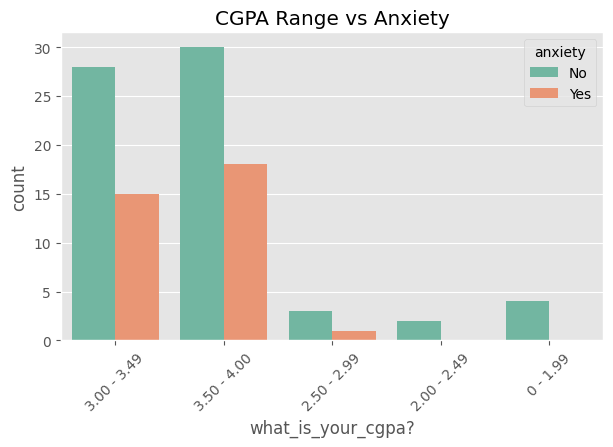

In [23]:
# CGPA vs Depression & Anxiety
# ----------------------------
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="what_is_your_cgpa?", hue="depression")
plt.title("CGPA Range vs Depression")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(7,4))
sns.countplot(data=df, x="what_is_your_cgpa?", hue="anxiety")
plt.title("CGPA Range vs Anxiety")
plt.xticks(rotation=45)
plt.show()


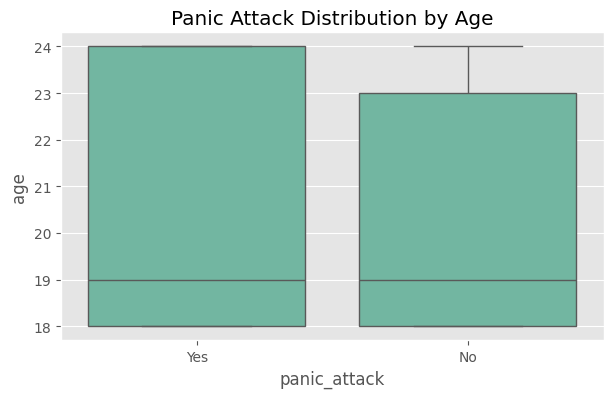

In [24]:
# PANIC ATTACK BY AGE
# ----------------------------
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="panic_attack", y="age")
plt.title("Panic Attack Distribution by Age")
plt.show()

